In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 09:49:45--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.7’

housing.csv.7       100%[===================>]   1.36M  --.-KB/s    in 0.1s    

2023-09-25 09:49:45 (12.2 MB/s) - ‘housing.csv.7’ saved [1423529/1423529]



In [4]:
df = pd.read_csv("housing.csv")

In [5]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for string_col in string_columns:
    df[string_col] = df[string_col].str.lower().str.replace(" ", "_")

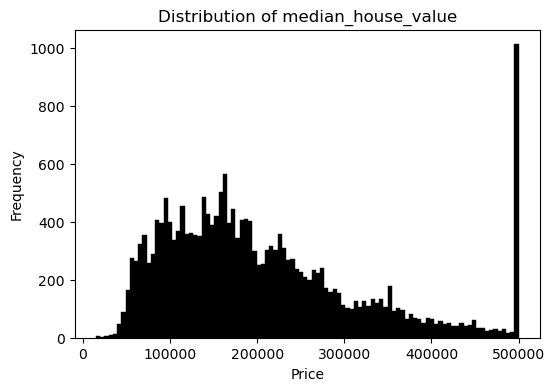

In [9]:
#prequestion
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=100, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median_house_value')

plt.show()

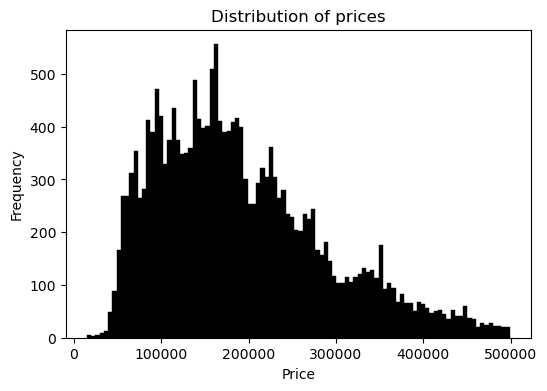

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value[df.median_house_value < 500000], bins=100, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()


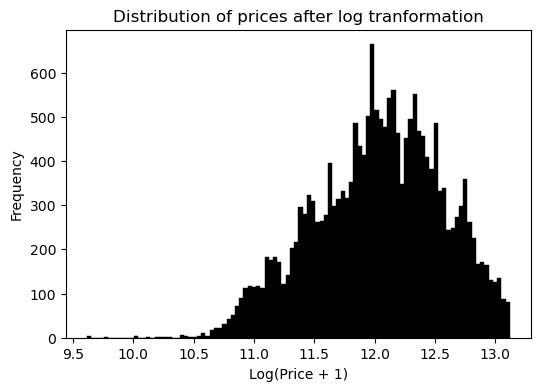

In [11]:
log_price = np.log1p(df.median_house_value[df.median_house_value < 500000])

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=100, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()



In [12]:
# preparing dataset

df = df[(df.ocean_proximity == '<1H_OCEAN'.lower()) | (df.ocean_proximity == 'INLAND'.lower())]


In [13]:
df['ocean_proximity'].unique()

array(['<1h_ocean', 'inland'], dtype=object)

In [14]:
columns_to_select = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

In [15]:
df = df[columns_to_select]

In [16]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [17]:
# question 1
for index, value in df.isnull().sum().items():
    if value > 0:
        print(index)

total_bedrooms


In [18]:
# question 2
df.population.median()

1195.0

In [19]:
# Prepare and split the dataset

#     Shuffle the dataset (the filtered one you created above), use seed 42.
#     Split your data in train/val/test sets, with 60%/20%/20% distribution.
#     Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [20]:
np.random.seed(42)


n = len(df)
index = np.arange(n)

np.random.shuffle(index)

n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - n_train - n_val

df_train = df.iloc[index[:n_train]]
df_val = df.iloc[index[n_train: n_train + n_val]]
df_test = df.iloc[index[n_train + n_val:]]

y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

In [21]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train.shape, df_val.shape, df_test.shape



((9412, 8), (3137, 8), (3138, 8))

In [22]:
# question 3


In [23]:
columns_to_model = list.copy(columns_to_select)
columns_to_model.remove('median_house_value')

In [24]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [25]:
def mrse(y_val, y):
    se = y_val - y
    sse = se ** 2
    mse = sse.mean()
    return(np.sqrt(mse))

In [26]:
def prepare_x_values(df, columns_name, fill_zeros_value):
    df = df.copy()

    df_num = df[columns_name]
    df_num = df_num.fillna(fill_zeros_value)
    X = df_num.values
    return X

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return(w_full[0], w_full[1:])

In [28]:
X_train_1 = prepare_x_values(df_train, columns_to_model, 0)
X_val_1 = prepare_x_values(df_val, columns_to_model, 0)

In [29]:
w0, w = train_linear_regression(X_train_1, y_train_log)

In [30]:
w0, w

(-9.760282389383054,
 array([-2.68175850e-01, -2.55894354e-01,  1.78278062e-03, -3.37898192e-05,
         2.93842680e-04, -1.52111419e-04,  3.96416869e-04,  1.80614799e-01]))

In [31]:
y_pred = w0 + X_val_1.dot(w)
round(mrse(y_pred, y_val_log), 2)

0.34

<Axes: xlabel='median_house_value', ylabel='Count'>

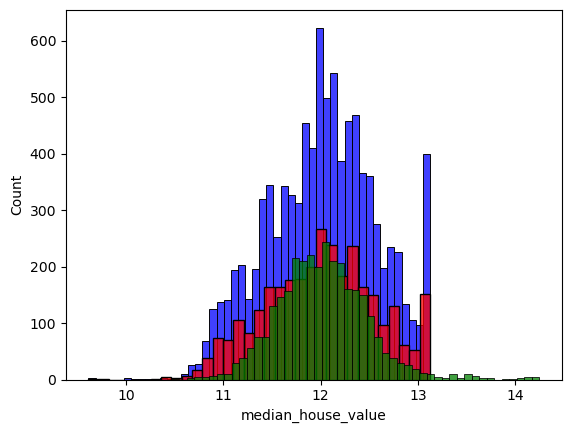

In [32]:
sns.histplot(y_train_log, color = 'blue')
sns.histplot(y_val_log, color = 'red')
sns.histplot(y_pred, color = 'green')

In [33]:
# find mean value
df_train.total_bedrooms.mean()

542.563854904486

In [34]:
X_train_2 = prepare_x_values(df_train, columns_to_model, 542.56)
X_val_2 = prepare_x_values(df_val, columns_to_model, 0)
w0, w = train_linear_regression(X_train_2, y_train_log)
y_pred = w0 + X_val_2.dot(w)
round(mrse(y_pred, y_val_log), 2)


0.34

In [35]:
# answer for question 3:
# both are eqally good: 0.34 vs 0.34

In [36]:
#question 4

In [37]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX += r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return(w_full[0], w_full[1:])

In [38]:
X_train = prepare_x_values(df_train, columns_to_model, 0)
X_val = prepare_x_values(df_val, columns_to_model, 0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train_log, r)
    y_pred = w0 + X_val_2.dot(w)
    mrserror = mrse(y_pred, y_val_log)
    print(r, w0, round(mrserror,2))

0 -9.760282389383054 0.34
1e-06 -9.760261748487883 0.34
0.0001 -9.75821872434113 0.34
0.001 -9.739684920341396 0.34
0.01 -9.558145712182068 0.34
0.1 -8.056406239488537 0.34
1 -3.132149833701119 0.34
5 -0.8408119245924143 0.35
10 -0.43797333730198207 0.35


In [39]:
# answer for question 4 is 0

In [40]:
# question 5

In [41]:
def generate_datasets(df, seed):
    n = len(df)
    index = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(index)

    n_train = int(n*0.6)
    n_val = int(n*0.2)
    n_test = n - n_train - n_val
    n, n_train, n_val, n_test

    df_train = df.iloc[index[:n_train]]
    df_val = df.iloc[index[n_train: n_train + n_val]]
    df_test = df.iloc[index[n_train + n_val:]]

    y_train = df_train.median_house_value
    y_val = df_val.median_house_value
    y_test = df_test.median_house_value
    
    return(df_train, y_train, df_val, y_val, df_test, y_test)


In [42]:
def train_and_evaluate_model(df_x_tr, df_x_val, data_columns, y_tr, y_val, fil_if_na = 0):
    X_train = prepare_x_values(df_x_tr, data_columns, fil_if_na)
    X_val = prepare_x_values(df_x_val, data_columns, 0)
    w0, w = train_linear_regression(X_train, np.log1p(y_tr))
    y_pred = w0 + X_val.dot(w)
    mrserror = mrse(y_pred, np.log1p(y_val))
    return(mrserror)

In [43]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, y_train, df_val, y_val, df_test, y_test = generate_datasets(df, seed)
    del df_train['median_house_value']
    score = train_and_evaluate_model(df_train, df_val, columns_to_model, y_train, y_val, fil_if_na = 0)
    print(seed, score)
    rmse_scores.append(score)

0 0.3377846115259249
1 0.33780665430132245
2 0.3384604473173376
3 0.3320086319057976
4 0.3394449206960175
5 0.343378078148394
6 0.33853387112904015
7 0.34814297152856816
8 0.3512727798511822
9 0.33416623731700995


In [44]:
round(np.std(rmse_scores),3)

0.006

In [45]:
# question 6

In [46]:
df_train, y_train, df_val, y_val, df_test, y_test = generate_datasets(df, 9)

In [47]:
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

In [48]:
X_full_train = prepare_x_values(df_full_train, columns_to_model, 0)
w0, w = train_linear_regression_reg(X_full_train, np.log1p(y_full_train), 0.001)

X_test = prepare_x_values(df_test, columns_to_model, 0)
X_test.shape
y_pred = w0 + X_test.dot(w)
mrserror = mrse(y_pred, np.log1p(y_test))

print(np.round(mrserror, 2))


0.33
